# 1.Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.naive_bayes import GaussianNB, MultinomialNB,  BernoulliNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')


# 2. Load Dataset

In [2]:
data=pd.read_csv('/kaggle/input/spam-dataset/spam.csv',encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# 3. Exploratory Data Analysis (EDA)


In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
data.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1004,ham,Umma. Did she say anything,NaN,NaN,NaN
5508,ham,"Machan you go to gym tomorrow, i wil come lat...",NaN,NaN,NaN
1495,ham,Hey gals.. Anyone of u going down to e driving...,NaN,NaN,NaN
5557,ham,No. I meant the calculation is the same. That ...,NaN,NaN,NaN
338,ham,"Sorry, I'll call later",NaN,NaN,NaN
1936,ham,My planning usually stops at \find hella weed,"smoke hella weed\""""",NaN,NaN
527,ham,Yes! How is a pretty lady like you single?,NaN,NaN,NaN
4826,ham,Yup but it's not giving me problems now so may...,NaN,NaN,NaN
3074,ham,Take us out shopping and Mark will distract Is...,NaN,NaN,NaN
1025,ham,I have a sore throat. It's scratches when I talk,NaN,NaN,NaN


In [6]:
data.shape

(5572, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
data.duplicated().sum()

403

# 4.Data Cleaning

In [10]:
data=data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
data=data.drop_duplicates(keep='first')
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


 # 5.Preprocessing

In [12]:
data=data.rename(columns={'v1':'target','v2':'text'})
data

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
data.duplicated().sum()

0

In [14]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
data["target"].replace({"spam":0,"ham":1},inplace=True)
data

,target,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


# 5. Exploratory Data Analysis

<Axes: ylabel='count'>

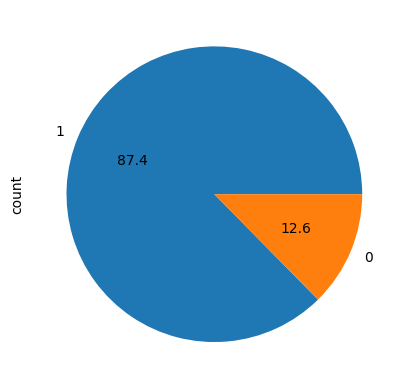

In [16]:
data.target.value_counts().plot.pie(autopct="%0.1f")

In [17]:
data["Num_Char"]=data["text"].apply(len)
data

,target,text,Num_Char
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,161
5568,1,Will Ì_ b going to esplanade fr home?,37
5569,1,"Pity, * was in mood for that. So...any other s...",57
5570,1,The guy did some bitching but I acted like i'd...,125


In [18]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')  # مرة واحدة فقط


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
data["word_num"] = data["text"].apply(lambda x: len(word_tokenize(str(x))))
data

,target,text,Num_Char,word_num
0,1,"Go until jurong point, crazy.. Available only ...",111,24
1,1,Ok lar... Joking wif u oni...,29,8
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,1,U dun say so early hor... U c already then say...,49,13
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,161,35
5568,1,Will Ì_ b going to esplanade fr home?,37,9
5569,1,"Pity, * was in mood for that. So...any other s...",57,15
5570,1,The guy did some bitching but I acted like i'd...,125,27


In [20]:
data["Sent_num"]=data["text"].apply(lambda x:len(nltk.sent_tokenize(x)))
data

,target,text,Num_Char,word_num,Sent_num
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1,U dun say so early hor... U c already then say...,49,13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,1,Will Ì_ b going to esplanade fr home?,37,9,1
5569,1,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,1,The guy did some bitching but I acted like i'd...,125,27,1


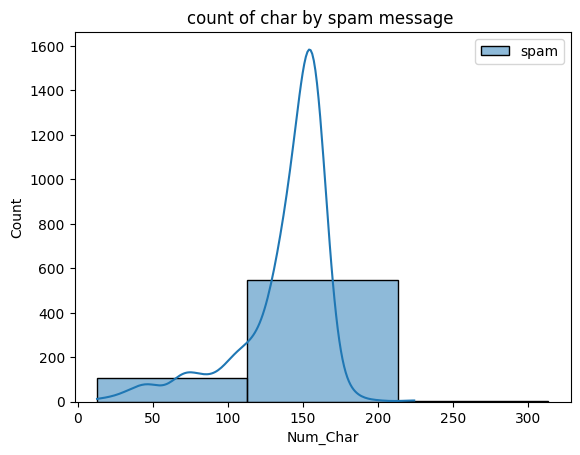

In [21]:
sns.histplot(data[data["target"]==0]["Num_Char"],binwidth=100,kde=True,label="spam")
plt.title("count of char by spam message ")
plt.legend()

In [22]:
df = data[["target", "Num_Char", "word_num", "Sent_num"]]


In [23]:
corr=df.corr()
corr

,target,Num_Char,word_num,Sent_num
target,1.000000,-0.384717,-0.262912,-0.263939
Num_Char,-0.384717,1.000000,0.965760,0.624139
word_num,-0.262912,0.965760,1.000000,0.679971
Sent_num,-0.263939,0.624139,0.679971,1.000000


<Axes: >

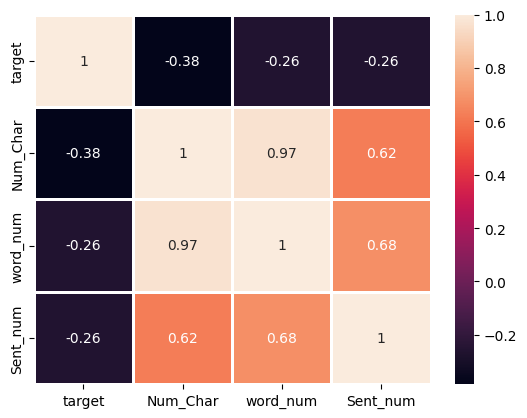

In [24]:
sns.heatmap(corr,annot=True,linewidths=1)

# 6.Text Cleaning Function (Lowercase, Tokenization, Stopwords, Punctuation, Lemmatization


In [25]:
import string
punc=string.punctuation
from nltk.corpus import stopwords
stop=stopwords.words('english')
from nltk.stem import WordNetLemmatizer
ps=WordNetLemmatizer()

In [26]:
def process(text):
  text=text.lower()
  token=nltk.word_tokenize(text)
  process_tokens=[]
  for word in token:
    if word not in punc and word not in stop:
      process_tokens.append(word)
  stemmed_word=[]
  for word in process_tokens:
    stemmed_word.append(ps.lemmatize(word, pos="v"))
  return " ".join(stemmed_word)

In [27]:
data["New_text"]=data["text"].apply(process)
data

,target,text,Num_Char,word_num,Sent_num,New_text
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy .. available bugis n gre...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor ... u c already say ...
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think go usf live around though
...,...,...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time try 2 contact u. u å£750 pound prize ...
5568,1,Will Ì_ b going to esplanade fr home?,37,9,1,ì_ b go esplanade fr home
5569,1,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood ... suggestions
5570,1,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like 'd interest buy something e...


# 7. Vectorization Setup (CountVectorizer & TF-IDF)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer()

# 8.Text Vectorization & Label Extraction (Model Input Preparation)

In [29]:
x=cv.fit_transform(data["New_text"]).toarray()
y=data.target.values

# 9.Train-Test Split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

# 10.Model Initialization (Naive Bayes Models)

In [31]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

# 11.Model Evaluation Function

In [32]:
models = [gnb, mnb, bnb]
model_names = ["GaussianNB", "MultinomialNB", "BernoulliNB"]
scores = []
preci = []
recall = []

def model(mo):
    mo.fit(x_train, y_train)
    pre = mo.predict(x_test)
    scores.append(accuracy_score(y_test, pre))
    preci.append(precision_score(y_test, pre))
    recall.append(recall_score(y_test, pre))

for m in models:
    model(m)

ndf = pd.DataFrame({
    "Models_names": model_names,
    "Accuracy": scores,
    "Precision": preci,
    "Recall": recall
})

print(ndf)


    Models_names  Accuracy  Precision    Recall
0     GaussianNB  0.890716   0.990232  0.885371
1  MultinomialNB  0.985493   0.994512  0.989083
2    BernoulliNB  0.977756   0.982703  0.992358


<Axes: xlabel='Models_names'>

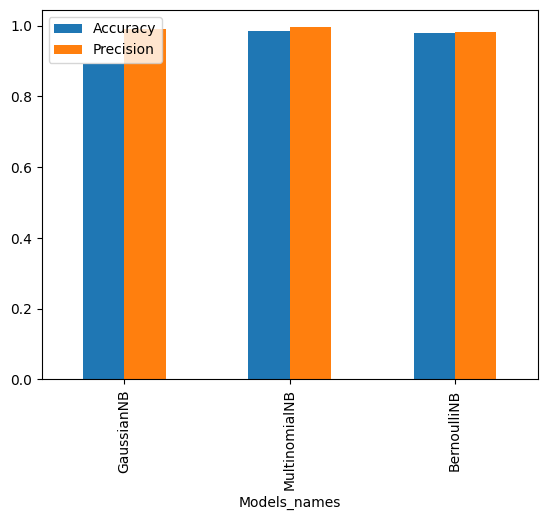

In [33]:
ndf.plot(x="Models_names",y=["Accuracy","Precision"],kind='bar')

In [34]:
import pickle

# Save vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(cv, f)
# Save Model
with open("model.pkl", "wb") as f:
    pickle.dump(mnb, f)
